# Visualization of training results

This notebook uses the saved training data and shows the results visually for further analysis. I tried to follow the guidelines from [this](http://rll.berkeley.edu/deeprlcourse/docs/plotting_handout.pdf) handout of the cs294 DeepRL course from UCBerkeley, in which it gives various suggestions for storing training data, making visualizations, etc..

Following these suggestions, the method used for making visualizations of the training results is as follows:

* Saving training results into .pkl files (logger.py) for later plotting and storing as much information as possible for later analysis, like losses, average losses (over a fixed-sized window) and bellman errors.
* Loading the results from the saved .pkl files (logger.py) after all training runs have been made (various runs with same hyperparameters, and also with two different seeds)
* Visualizing the results (this notebook) using std plots of the various saved statistics.

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt

import logger
import plotter

%matplotlib inline

## Plot single training runs

This part deals with the visualization of single runs (for testing purposes). There is going to be at least one training
session .pkl file in the repo (and perhaps no more, as each weights ~ 10MB).

In [13]:
# folder where all runs are located
BASE_FOLDER = os.path.join( os.getcwd(), 'results' )

INFO> loaded training data from session [banana_improvements_config_2_2_run_3_pytorch_seed_0] with timestamp [Thu May  9 07:42:57 2019]


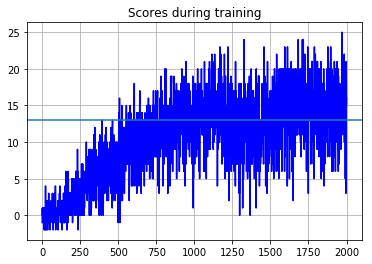

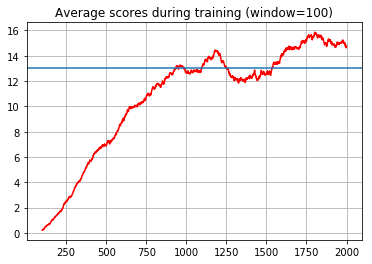

In [14]:
def plotSeries( series, 
                startStep = 1, 
                color = 'r', 
                title = '', 
                linestyle = '-', 
                fig = None, 
                axes = None, 
                isScore = True ) :
    # iteration indices (recall, smoothed start at step 100)
    _steps = np.arange( len( series ) ) + startStep
    
    if fig is None or axes is None :
        fig, axes = plt.subplots()
    
    axes.grid( True )
    axes.plot( _steps, series, color = color, linestyle = linestyle )
    axes.set_title( title )
    
    # if scores plot, then plot the requirement
    if isScore :
        axes.axhline( 13. )

def plotSingleRun( sessionId ) :
    # path to .pkl file (from sessionId)
    _folder = os.path.join( BASE_FOLDER, sessionId )
    _filepath = os.path.join( _folder, sessionId + '_results.pkl' )
    
    # load all training results
    _data = logger.loadTrainingResults( _filepath )
    
    # plot all results available
    plotSeries( _data['scoresAll'], color = 'b', title = 'Scores during training' )
    plotSeries( _data['scoresAvg'], startStep = 100, color = 'r', title = 'Average scores during training (window=100)' )
    ## plotSeries( _data['bellmanErrors'], color = 'b', title = 'Bellman Errors' )
    
plotSingleRun( 'banana_improvements_config_2_2_run_3_pytorch_seed_0' )

## Ploting various runs using std-plots

We run multiple training **sessions** with different configurations and group them in **experiments**. The results in this section will consist on std-plots with regions shaded to represent standard deviation over runs over same experiment, and the mean shown as a single strong lineplot in between.

The experiments for which we have various runs consists of the following:

* Experiment 1: Different hyperparameters configuration (exploration)
* Experiment 2: Impact of improvements (no-ddqn, ddqn-only, per-only, ddqn+per)
* Experiment 3: Testing per+ddqn in two settings of low-exploration v.s. regular-exploration

In [19]:
# some common loader functions, as the experiments have ...
# a common naming-structure along experiments
#
# banana_(EXPERIMENT-NAME)_config_(EXPERIMENT-NUMBER)_(CONFIG-ID)_run_(CONFIG-RUN-ID)_pytorch_seed_(SEED-ID)
#

from itertools import product
from IPython.core.debugger import set_trace

def loadExperimentResults( experimentName, experimentNumber, 
                           configIds, configRunIds,
                           seeds ) :
    _sessionsResults = { 'scoresAvg' : [],
                         'bellmanErrors' : [] }
    
    for sessConfigId, sessRunId, sessSeed in product( configIds, configRunIds, seeds ) :
        _sessionName = 'banana_' + experimentName + '_config_' + str(experimentNumber) + '_' + str(sessConfigId) + \
                       '_run_' + str( sessRunId ) + '_pytorch_seed_' + str(sessSeed)
        
        _sessionFolder = os.path.join( BASE_FOLDER,_sessionName )
        
        _resultsFilepath = os.path.join( _sessionFolder, _sessionName + '_results.pkl' )
        
        _resultsData = logger.loadTrainingResults( _resultsFilepath )
        
        _sessionsResults['scoresAvg'].append( _resultsData['scoresAvg'] )
        ## _sessionsResults['bellmanErrors'].append( _resultsData['bellmanErrors'] )
        _sessionsResults['bellmanErrors'].append( np.squeeze( np.sum( np.array( _resultsData['bellmanErrors'] ), axis = 1 ) ) )
        
        ## set_trace()
        
    return _sessionsResults

In [20]:
_experiment1ResultsConfig1 = loadExperimentResults( 'hypertests', 1, [1], [0,1,2,3,4], [0] )
_experiment1ResultsConfig2 = loadExperimentResults( 'hypertests', 1, [2], [0,1,2,3,4], [0] )

INFO> loaded training data from session [banana_hypertests_config_1_1_run_0_pytorch_seed_0] with timestamp [Wed May  8 23:49:52 2019]
INFO> loaded training data from session [banana_hypertests_config_1_1_run_1_pytorch_seed_0] with timestamp [Thu May  9 00:14:00 2019]
INFO> loaded training data from session [banana_hypertests_config_1_1_run_2_pytorch_seed_0] with timestamp [Thu May  9 00:38:17 2019]
INFO> loaded training data from session [banana_hypertests_config_1_1_run_3_pytorch_seed_0] with timestamp [Thu May  9 01:02:23 2019]
INFO> loaded training data from session [banana_hypertests_config_1_1_run_4_pytorch_seed_0] with timestamp [Thu May  9 01:26:26 2019]
INFO> loaded training data from session [banana_hypertests_config_1_2_run_0_pytorch_seed_0] with timestamp [Thu May  9 01:50:41 2019]
INFO> loaded training data from session [banana_hypertests_config_1_2_run_1_pytorch_seed_0] with timestamp [Thu May  9 02:15:22 2019]
INFO> loaded training data from session [banana_hypertests_con

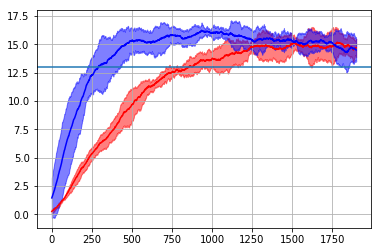

In [6]:
axes = plotter.drawStdPlot(_experiment1ResultsConfig1['scoresAvg'], 'Scores', 'x', 'y')
plotter.drawStdPlot( _experiment1ResultsConfig2['scoresAvg'], 'Scores', 'x', 'y', color = 'b', axes = axes )
axes.axhline( y = 13., xmin = 0, xmax = 2000 )
axes.grid( True )

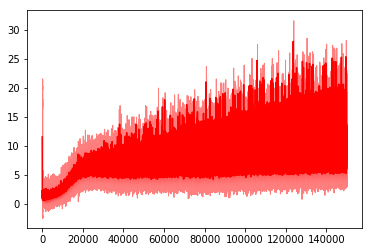

In [21]:
axes = plotter.drawStdPlot(_experiment1ResultsConfig1['bellmanErrors'], 'Scores', 'x', 'y')
#plotter.drawStdPlot( _experiment1ResultsConfig2['scoresAvg'], 'Scores', 'x', 'y', color = 'b', axes = axes )
#axes.axhline( y = 13., xmin = 0, xmax = 2000 )
#axes.grid( True )

In [7]:
_experiment2ResultsConfig0 = loadExperimentResults( 'hypertests', 1, [1], [0,1,2,3,4], [0] )
_experiment2ResultsConfig1 = loadExperimentResults( 'improvements', 2, [1], [0,1,2,3,4], [0] )
_experiment2ResultsConfig2 = loadExperimentResults( 'improvements', 2, [2], [0,1,2,3,4], [0] )
_experiment2ResultsConfig3 = loadExperimentResults( 'improvements', 2, [3], [0,1,2,3,4], [0] )

INFO> loaded training data from session [banana_hypertests_config_1_1_run_0_pytorch_seed_0] with timestamp [Wed May  8 23:49:52 2019]
INFO> loaded training data from session [banana_hypertests_config_1_1_run_1_pytorch_seed_0] with timestamp [Thu May  9 00:14:00 2019]
INFO> loaded training data from session [banana_hypertests_config_1_1_run_2_pytorch_seed_0] with timestamp [Thu May  9 00:38:17 2019]
INFO> loaded training data from session [banana_hypertests_config_1_1_run_3_pytorch_seed_0] with timestamp [Thu May  9 01:02:23 2019]
INFO> loaded training data from session [banana_hypertests_config_1_1_run_4_pytorch_seed_0] with timestamp [Thu May  9 01:26:26 2019]
INFO> loaded training data from session [banana_improvements_config_2_1_run_0_pytorch_seed_0] with timestamp [Thu May  9 03:54:13 2019]
INFO> loaded training data from session [banana_improvements_config_2_1_run_1_pytorch_seed_0] with timestamp [Thu May  9 04:19:14 2019]
INFO> loaded training data from session [banana_improvemen

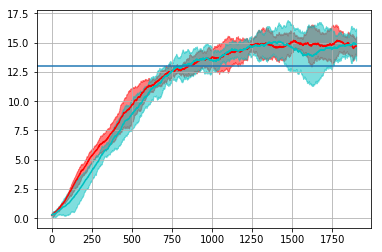

In [8]:
axes = plotter.drawStdPlot(_experiment2ResultsConfig0['scoresAvg'], 'Scores', 'x', 'y')
#plotter.drawStdPlot( _experiment2ResultsConfig1['scoresAvg'], 'Scores', 'x', 'y', color = 'b', axes = axes )
#plotter.drawStdPlot( _experiment2ResultsConfig2['scoresAvg'], 'Scores', 'x', 'y', color = 'm', axes = axes )
plotter.drawStdPlot( _experiment2ResultsConfig3['scoresAvg'], 'Scores', 'x', 'y', color = 'c', axes = axes )
axes.axhline( y = 13., xmin = 0, xmax = 2000 )
axes.grid( True )

In [9]:
_experiment3ResultsConfig1 = loadExperimentResults( 'exploration', 3, [1], [0,1,2,3,4], [0] )
_experiment3ResultsConfig2 = loadExperimentResults( 'exploration', 3, [2], [0,1,2,3,4], [0] )

INFO> loaded training data from session [banana_exploration_config_3_1_run_0_pytorch_seed_0] with timestamp [Thu May  9 11:44:41 2019]
INFO> loaded training data from session [banana_exploration_config_3_1_run_1_pytorch_seed_0] with timestamp [Thu May  9 12:10:29 2019]
INFO> loaded training data from session [banana_exploration_config_3_1_run_2_pytorch_seed_0] with timestamp [Thu May  9 12:36:05 2019]
INFO> loaded training data from session [banana_exploration_config_3_1_run_3_pytorch_seed_0] with timestamp [Thu May  9 13:01:01 2019]
INFO> loaded training data from session [banana_exploration_config_3_1_run_4_pytorch_seed_0] with timestamp [Thu May  9 13:27:05 2019]
INFO> loaded training data from session [banana_exploration_config_3_2_run_0_pytorch_seed_0] with timestamp [Thu May  9 13:53:34 2019]
INFO> loaded training data from session [banana_exploration_config_3_2_run_1_pytorch_seed_0] with timestamp [Thu May  9 14:31:28 2019]
INFO> loaded training data from session [banana_explora

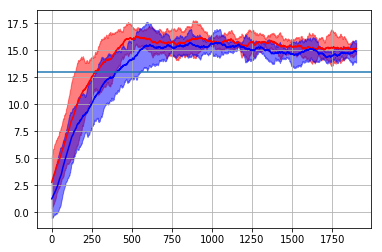

In [10]:
axes = plotter.drawStdPlot(_experiment3ResultsConfig1['scoresAvg'], 'Scores', 'x', 'y')
plotter.drawStdPlot( _experiment3ResultsConfig2['scoresAvg'], 'Scores', 'x', 'y', color = 'b', axes = axes )
axes.axhline( y = 13., xmin = 0, xmax = 2000 )
axes.grid( True )

## Pytorch results over various seeds

First use the training results from the runs using pytorch as library, and over 21 random seeds.

In [11]:
# folder where all runs are located
_baseFolder = os.path.join( os.getcwd(), 'results' )
# base name for all runs using pytorch
_baseName = 'banana_simple_pth'
# seeds used
_seeds = np.arange( 21 )

# load all training runs
_runs = { 'scoresAll' : [], 
          'scoresAvg' : [],
          'losses' : [],
          'bellmanErrors' : [] }
for seed in _seeds :
    _resultsFolderName = _baseName + '_' + str( seed )
    _resultsFolderPath = os.path.join( _baseFolder, _resultsFolderName )
    
    _resultsFileName = ''
    _partialFileName = _baseName + '_' + str( seed ) + '_results'
    _candidates = os.listdir( _resultsFolderPath )
    for candidate in _candidates :
        if _partialFileName in candidate :
            _resultsFileName = candidate
    
    if _resultsFileName == '' :
        continue
    
    _filepath = os.path.join( _resultsFolderPath, _resultsFileName )
    _runData = logger.loadTrainingResults( _filepath )
    
    _runs['scoresAll'].append( _runData['scoresAll'] )
    _runs['scoresAvg'].append( _runData['scoresAvg'] )
    _runs['losses'].append( _runData['losses'] )
    _runs['bellmanErrors'].append( _runData['bellmanErrors'] )

print( 'len(runs[scoresAll]) : ', len( _runs['scoresAll'] ) )
print( 'len(runs[scoresAll][0]) : ', len( _runs['scoresAll'][0] ) )

FileNotFoundError: [Errno 2] No such file or directory: '/home/gregor/Documents/wilbert/repos/DeeprlND-projects/project1-navigation/results/banana_simple_pth_0'

In [ ]:
axes = plotter.drawStdPlot( _runs['scoresAvg'], 'Scores during training', 'x', 'y' )
axes.axhline( y = 13., xmin = 0, xmax = 2000 )

axes = plotter.drawBatchResults( _runs['scoresAvg'], 'Scores during training', 'x', 'y' )
axes.axhline( y = 13., xmin = 0, xmax = 2000 )

In [ ]:
_runScoresAvg = np.array( _runs['scoresAvg'] )

In [ ]:
_mean = _runScoresAvg.mean( axis = 0 )
_std = _runScoresAvg.std( axis = 0 )

print( 'mean: ', _mean )
print( 'std: ', _std )

In [ ]:
fig, ax = plt.subplots()
ax.plot( np.arange( len( _mean ) ), _mean, 'r-' )
ax.fill_between( np.arange( len( _mean ) ), _mean - 2. * _std, _mean + 2. * _std )

In [ ]:
?ax.fill_between

In [ ]:
( _runs['bellmanErrors'][0][0].shape )